# Librairie PIL : Python Imaging Library

La bibliothèque Python Imaging ajoute des capacités de traitement d'images à votre interpréteur Python. 
Cette bibliothèque offre un support étendu des formats de fichiers, une représentation interne efficace, 
et des capacités de traitement d'images puissantes.
La bibliothèque d'images de base est conçue pour un accès rapide aux données stockées constitue 
une base solide pour un outil général de traitement d'images.

## Utilisation de la classe Image
La classe la plus importante de la bibliothèque d'imagerie Python est la classe __Image__, définie dans le module
portant le même nom. 



(200, 100)


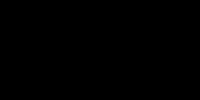

In [1]:
#creation d'un rectangle noir
from PIL import Image

im = Image.new('RGB', (200, 100), 'black')
im.show()
(ncol, nlig) = im.size
print(im.size)
im

### lecture d'un fichier image

In [4]:
from PIL import Image

try:
    im = Image.open("lena.ppm")   # retourne un objet Image
    
# affichage du format de l'image, de sa taille (tuple) et du mode = RGB ou CMYK
    print(im.format, im.size, im.mode)
    im.show()
    
except FileNotFoundError:
    print("no file")




PPM (512, 512) RGB


__Exercice__ : 
* réutiliser le même code pour charger la même image au format png

In [3]:
from PIL import Image

try:
    im = Image.open("lena.png")   # retourne un objet Image
    
# affichage du format de l'image, de sa taille (tuple) et du mode = RGB ou CMYK
    print(im.format, im.size, im.mode)
    im.show()
    
except FileNotFoundError:
    print("no file")

PNG (512, 512) RGB


### Mode d'une image

Le mode d'une image définit le type et la profondeur d'un pixel dans l'image :

* 1 (1-bit pixels, black and white, stored as 8-bit pixels) 
* L (8-bit pixels, black and white)   = luminescence pour les images en niveaux de gris
* P (8-bit pixels, mapped to any other mode using a colour palette)
* RGB (3x8-bit pixels, true colour) 
* RGBA (4x8-bit pixels, true colour with transparency mask) 
* CMYK (4x8-bit pixels, colour separation) 
* YCbCr (3x8-bit pixels, colour video format) 
* I (32-bit integer pixels) 
* F (32-bit floating point pixels

## Conversion de l'image au format JPEG


In [2]:
import re # module des expressions régulières
files = input("nom des fichiers à convertir avec leur extension: ")
files = files.strip(' ') #  enleve les espaces en entete et en queue
files = re.split(r" {1,}", files) # separateur 1 espace voire plusieurs espaces

print(files)
print("------------")
for infile in files:
    outfile = infile.split(sep='.')[0]  +'.jpg'
    print(infile , '->', outfile)
    
    if infile != outfile:
        try:
            im = Image.open(infile)   # retourne un objet Image
            im.save(outfile)
        except FileNotFoundError:
            print(infile, ' : file missing')
    

nom des fichiers à convertir avec leur extension: lena.png
['lena.png']
------------
lena.png -> lena.jpg


## Couper, coller et fusion d'image

La classe __Image__ contient des méthodes permettant de manipuler des régions au sein d'une image. Pour
extraire un sous-rectangle d'une image, utilisez la méthode de recadrage __crop__.

JPEG (512, 512) RGB
None (300, 300) RGB


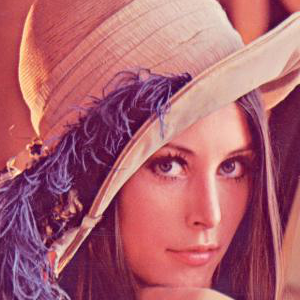

In [3]:
from PIL import Image

try:
    im = Image.open("lena.jpg")   # retourne un objet Image
    
# affichage du format de l'image, de sa taille (tuple) et du mode = RGB ou CMYK
    print(im.format, im.size, im.mode)
    
    box=(100, 100, 400, 400)  # 4-tuple = (gauche, haut, droite, bas)  origine (0, 0) = (gauche, haut)
    # [gauche, droite[ x [haut, bas[
    region = im.crop(box)
#    region.show()
    print(region.format, region.size, region.mode)
    
except FileNotFoundError:
    print("no file")

region

### retournement et rotation
La classe Image contient des méthodes pour redimensionner et faire pivoter une image. La première prend un tuple donnant la nouvelle taille, la seconde l'angle en degrés dans le sens inverse des aiguilles d'une montre.


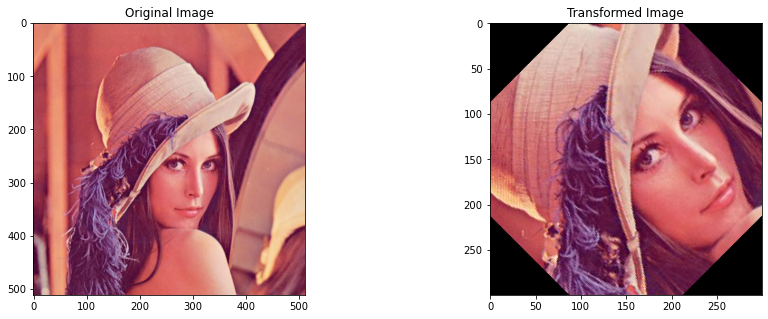

In [6]:
import matplotlib.pyplot as plt

region_flip = region.transpose(Image.FLIP_LEFT_RIGHT)
region_flip.show()
    
#region_flip = region.transpose(Image.FLIP_TOP_BOTTOM)
#region_flip.show()

region_rot = region.transpose(Image.ROTATE_180)
region_rot.show()

region_rot = region.rotate(45) # degrees counter-clockwise
region_rot.show()

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(im);
ax[0].set_title('Original Image')
ax[1].imshow(region_rot);
ax[1].set_title('Transformed Image');

In [7]:
(nlig, ncol) = region_flip.size
box=(0, 0, nlig, ncol)
im.paste(region_flip, box)
im.show()

In [8]:
import numpy as np
imArray = np.array(im)
print(imArray.shape)

(512, 512, 3)


### Transformations des couleurs
La bibliothèque supporte les transformations entre chaque mode supporté et les modes "L" et "RGB". et "RGB". Pour convertir entre d'autres modes, vous devez utiliser une image intermédiaire, généralement une image "RGB".

In [5]:
imgray=im.convert('L')
imgray.show()
print(im.mode, '->', imgray.mode)

RGB -> L


### Amélioration de l'image
* filtrages prédéfinis :
    BLUR,
    CONTOUR,
    DETAIL,
    EDGE_ENHANCE,
    EDGE_ENHANCE_MORE,
    EMBOSS,
    FIND_EDGES,
    SHARPEN,
    SMOOTH,
    SMOOTH_MORE


<PIL.Image.Image image mode=RGB size=512x512 at 0x2A2D8073460>


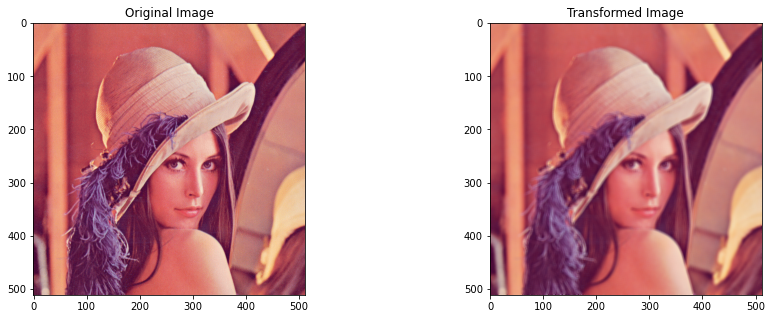

In [6]:
from PIL import ImageFilter
import matplotlib.pyplot as plt

out = im.filter(ImageFilter.BLUR)
print(out)
im.show()
out.show()

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(im);
ax[0].set_title('Original Image')
ax[1].imshow(out);
ax[1].set_title('Transformed Image');


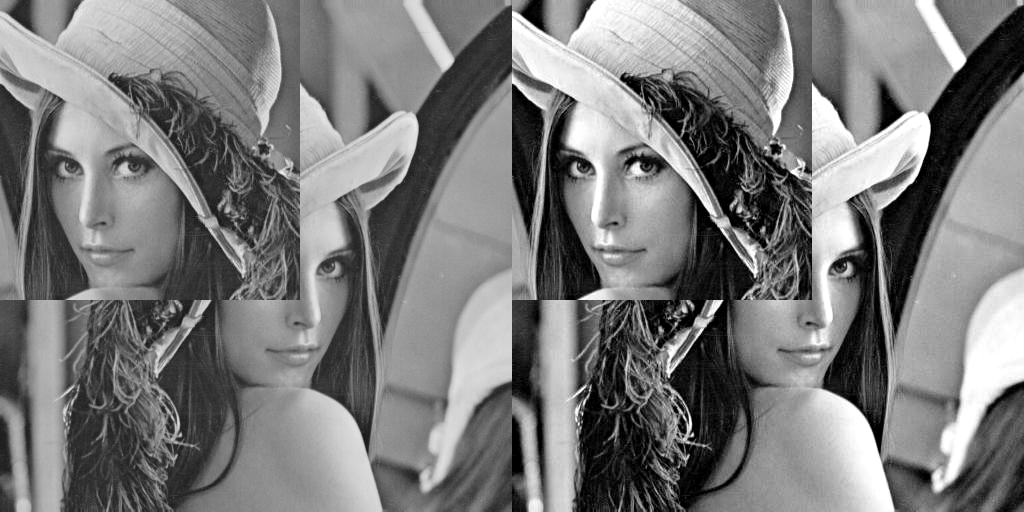

In [11]:
from PIL import ImageEnhance
import matplotlib.pyplot as plt

outenh = ImageEnhance.Contrast(imgray).enhance(1.5)
outenh.show()

(ncol, nlig) = imgray.size

new_image = Image.new('RGB', (2*ncol, nlig), 'white')
new_image.paste(imgray, (0, 0))
new_image.paste(outenh, (ncol, 0))

new_image

In [12]:
new_image = Image.new('RGB', (200, 400), 'black')
new_image.show()
(ncol, nlig) = new_image.size
new_image.size

(200, 400)

min et max  [(28, 244)]
[262144] 262144


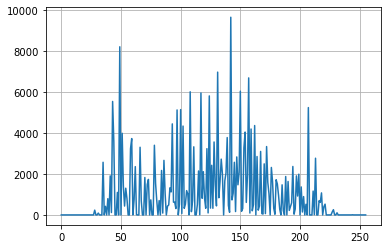

In [7]:
from PIL import ImageStat
import matplotlib.pyplot as plt

stat = ImageStat.Stat(imgray)
print('min et max ', stat.extrema)
print(stat.count, imgray.size[0]*imgray.size[1])

h=imgray.histogram()
plt.plot(h)
plt.grid()


In [8]:
from PIL import ImageDraw
mask = Image.new("L", im.size, 0)
draw = ImageDraw.Draw(mask)
draw.ellipse((0, 0, 512, 512), fill=255)
draw.ellipse((0, 0, 256, 256), fill=127)
mask.show()

im0 = Image.new('RGB', im.size, 'white')
im0.paste(im, box=(0,0), mask=mask) # PROBLEME
im0.show()

im2 = Image.composite(im, im0, mask)
im2.show()

In [59]:
a=np.array(mask)
a.all()>127

False

In [1]:
# conda install -c conda-forge opencv
# https://www.delftstack.com/fr/howto/python/conda-install-cv2/
# https://www.geeksforgeeks.org/reading-image-opencv-using-python/
    
# Python code to read image
import cv2
 
# To read image from disk, we use
# cv2.imread function, in below method,
img = cv2.imread("geeksforgeeks.png", cv2.IMREAD_COLOR)
 
# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array
cv2.imshow("Cute Kitens", img)
 
# To hold the window on screen, we use cv2.waitKey method
# Once it detected the close input, it will release the control
# To the next line
# First Parameter is for holding screen for specified milliseconds
# It should be positive integer. If 0 pass an parameter, then it will
# hold the screen until user close it.
cv2.waitKey(0)
 
# It is for removing/deleting created GUI window from screen
# and memory
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'